In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [3]:
housing = df[df.district == "Чиланзарский"]
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [12]:
housing.info()        # ustunlar, tur va null qiymatlar

<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 2 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    1616 non-null   object 
 1   rooms       1616 non-null   int64  
 2   size        1616 non-null   float64
 3   level       1616 non-null   int64  
 4   max_levels  1616 non-null   int64  
 5   price       1616 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 88.4+ KB


In [13]:
housing.describe()

,rooms,size,level,max_levels,price
count,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000
mean,2.357673,61.907834,3.278465,5.369431,45617.487624
std,1.003790,25.908779,1.893232,2.128452,22726.766565
min,1.000000,15.000000,1.000000,2.000000,12000.000000
25%,2.000000,45.000000,2.000000,4.000000,32450.000000
50%,2.000000,58.000000,3.000000,4.000000,39500.000000
75%,3.000000,72.000000,4.000000,5.000000,52500.000000
max,8.000000,240.000000,11.000000,12.000000,190000.000000


In [14]:
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [16]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix['price'].sort_values(ascending=False))

price         1.000000
size          0.843639
rooms         0.703835
max_levels    0.340015
level         0.138780
Name: price, dtype: float64


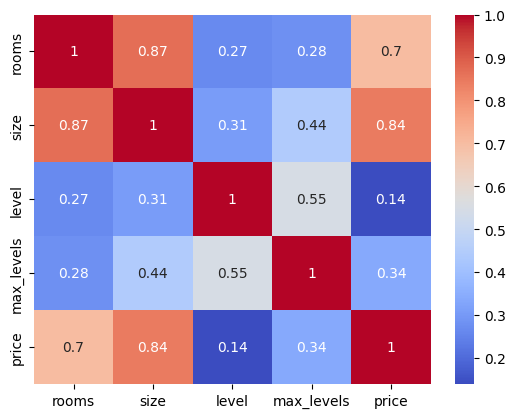

In [17]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


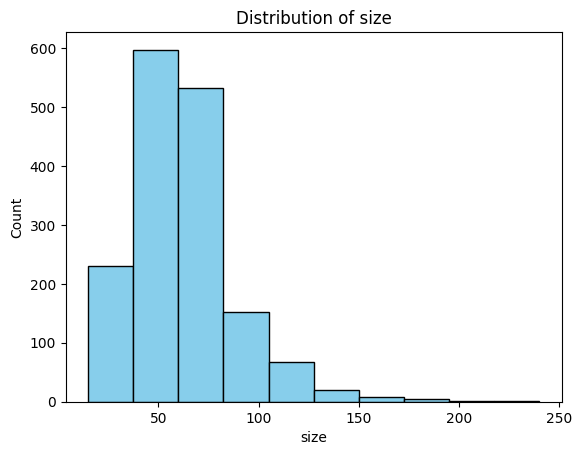

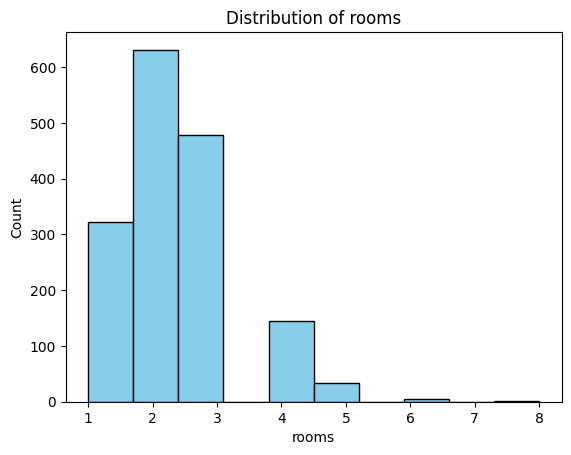

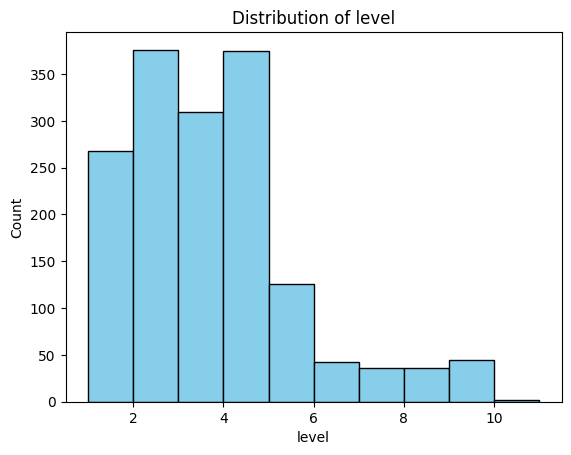

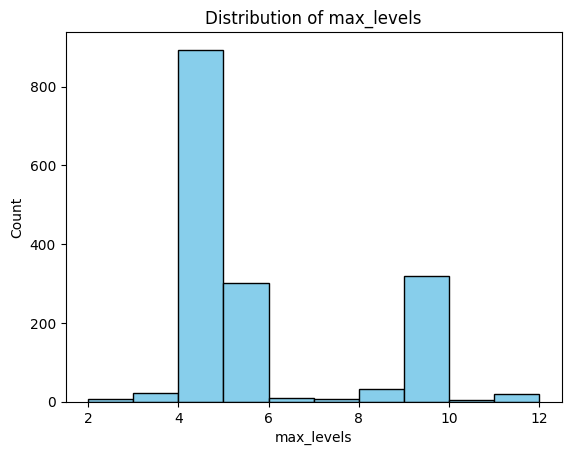

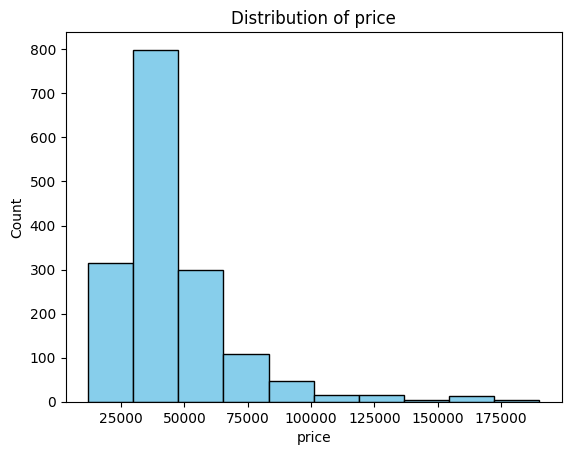

In [18]:
for feature in features + ['price']:
    plt.hist(housing[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


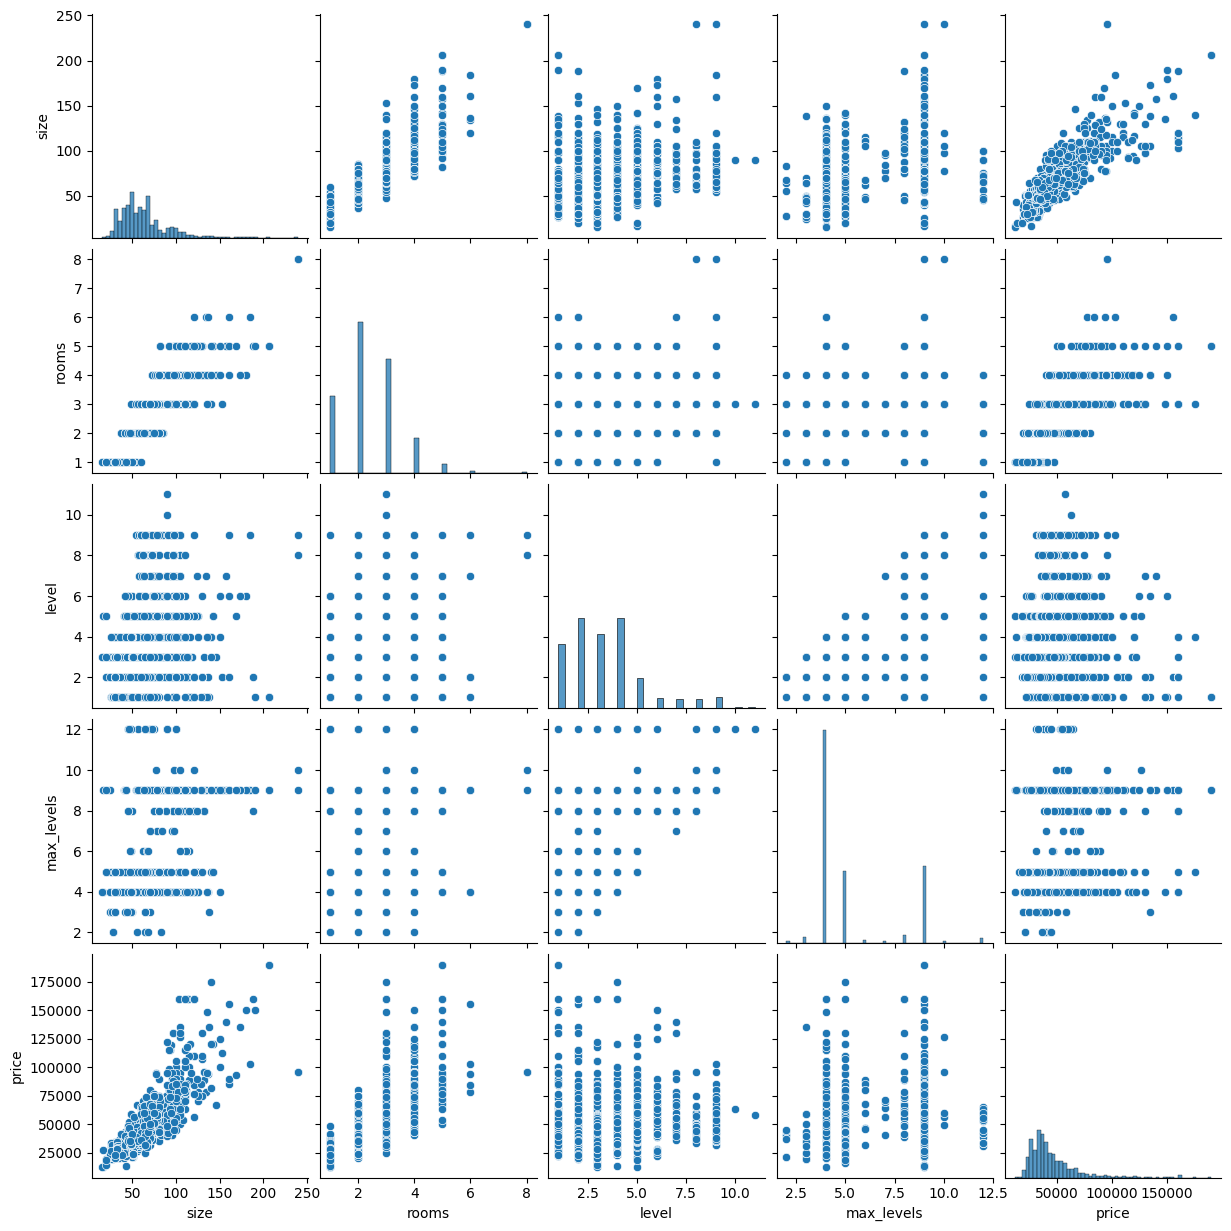

In [19]:
sns.pairplot(housing[['size','rooms','level','max_levels','price']])
plt.show()


In [4]:
# Featurelar ro'yxat
features = ['size', 'rooms', 'level', 'max_levels']

features = ['size', 'rooms', 'level', 'max_levels']
theta0 = np.float64(-1009.2734590636028)
theta1 = np.float64(753.8444656913779)


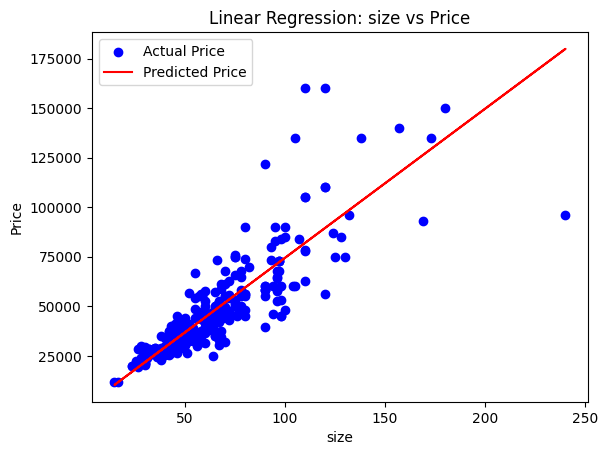

features = ['size', 'rooms', 'level', 'max_levels']
theta0 = np.float64(8725.137142925065)
theta1 = np.float64(15633.445883764278)


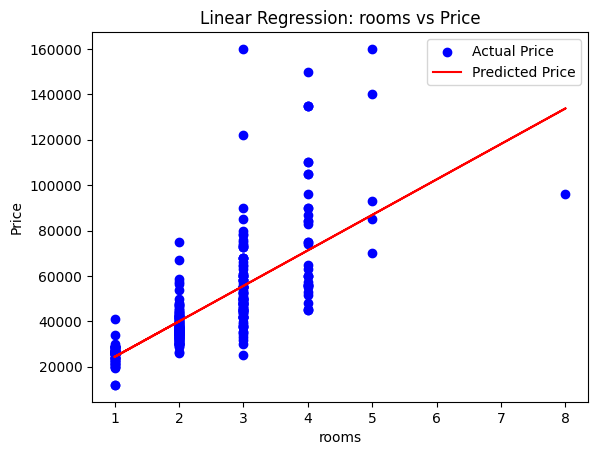

features = ['size', 'rooms', 'level', 'max_levels']
theta0 = np.float64(40150.41199079207)
theta1 = np.float64(1620.5028962981364)


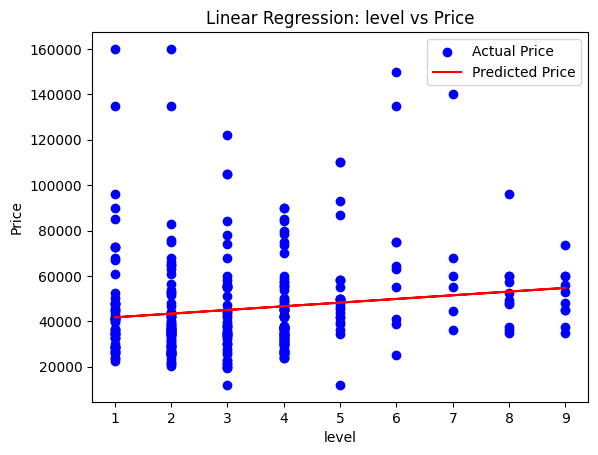

features = ['size', 'rooms', 'level', 'max_levels']
theta0 = np.float64(26278.31209318769)
theta1 = np.float64(3559.55892660361)


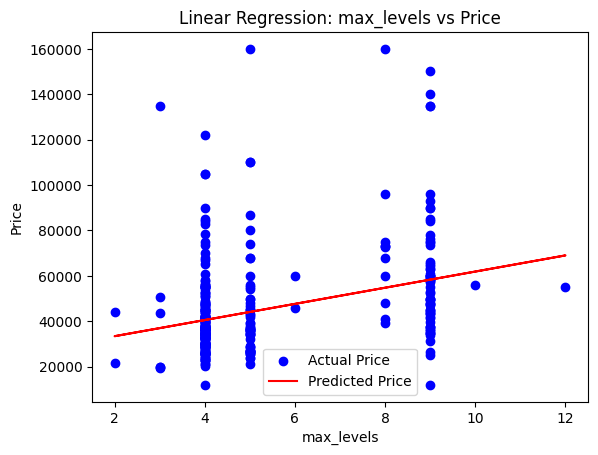

In [10]:
for feature in features:
    print(f"{features = }")

    X = housing[[feature]]
    Y = housing['price']

    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

    # model yaratish va o'qitish

    model = LinearRegression()
    model.fit(x_train,y_train)

    # koifdentlar 

    theta1 = model.coef_[0]
    theta0 = model.intercept_

    print(f"{theta0 = }")
    print(f"{theta1 = }")


    y_pred = model.predict(x_test)


    MAE = mean_absolute_error(y_test,y_pred)
    RMSE = mean_squared_error(y_test,y_pred)

    # Vizualizatsiya
    plt.scatter(x_test, y_test, color='blue', label='Actual Price')
    plt.plot(x_test, y_pred, color='red', label='Predicted Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f"Linear Regression: {feature} vs Price")
    plt.legend()
    plt.show()